# 🧠 Convolutional Neural Network (CNN) — Detailed Breakdown with Mathematical Analysis

---

## 1. 📥 Input Layer

**Input format**:
- Grayscale Image: shape = (H, W)
- RGB Image: shape = (H, W, 3)

Each pixel value is typically normalized (e.g., scaled to [0, 1] or standardized).

---

## 2. 🧮 Convolutional Layer

### 🎯 Purpose:
Extract **local features** such as edges, corners, and textures using filters.

### 🔍 Operation:
- A **filter** (or kernel) is a small matrix (e.g., 3×3).
- It **slides (convolves)** over the image.
- Computes a **dot product** at each location.

### ✏️ Mathematical Formula:

Let:
- Input image: $X \in \mathbb{R}^{H 	imes W}$
- Filter: $F \in \mathbb{R}^{k 	imes k}$

Then:
$$
Y[i, j] = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} X[i+m, j+n] \cdot F[m, n]
$$

### 🔢 With multiple filters:
- If 16 filters used → output will be shape = (H', W', 16)

### 🧠 Padding and Stride:
- **Padding (P)**: Adds zeros around the input
- **Stride (S)**: Step size of the filter

Output size (without channels):
$$
	ext{Output Size} = \left(\frac{H - k + 2P}{S} + 1\right) 	imes \left(\frac{W - k + 2P}{S} + 1\right)
$$

---

## 3. 🔀 Activation Function (ReLU)

### 🎯 Purpose:
Introduce **non-linearity**.

### ✏️ ReLU Formula:
$$
f(x) = \max(0, x)
$$

### 🔍 Derivative (for backprop):
$$
f'(x) = 
\begin{cases}
1, & \text{if } x > 0 \\
0, & \text{otherwise}
\end{cases}
$$

---

## 4. 🔽 Pooling Layer (e.g., MaxPooling)

### 🎯 Purpose:
- Downsample the feature map
- Reduce spatial dimensions
- Retain **important features**

### 🧠 Example:
**2x2 Max Pooling** on:
```
[[1, 3],
 [4, 2]] → max = 4
```

### ✏️ Output Size:
$$
	ext{Output Size} = \left(\frac{H}{p}\right) 	imes \left(\frac{W}{p}\right)
$$
Where `p` is pooling window size (e.g., 2)

---

## 5. 🔁 Stacking Layers

More **Conv → ReLU → Pooling** layers:
- Layer 1: detects edges
- Layer 2: detects shapes
- Layer 3: detects object parts

---

## 6. 🔄 Flatten Layer

### 🎯 Purpose:
Convert multi-dimensional feature maps into a 1D vector.

### ✏️ Example:
Input shape = (6, 6, 32) → Flattened = 1152

---

## 7. 🧠 Fully Connected (Dense) Layer

### 🎯 Purpose:
Classify based on features extracted.

### ✏️ Equation:
$$
z = W^T x + b \\
a = f(z)
$$

Where:
- $W$: weight matrix
- $x$: input vector
- $b$: bias
- $f$: activation (ReLU, Softmax)

---

## 8. 🎯 Output Layer

### For Classification:
Use **Softmax**:
$$
	ext{Softmax}(z_i) = frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

### Output:
Probability for each class (e.g., digits 0–9)

---

## ✅ CNN Architecture Summary

| Layer       | Output Shape  | Parameters        |
|-------------|---------------|-------------------|
| Input       | 32x32x3       | 0                 |
| Conv2D      | 30x30x16      | (3×3×3×16) + 16   |
| ReLU        | 30x30x16      | 0                 |
| MaxPooling  | 15x15x16      | 0                 |
| Conv2D      | 13x13x32      | (3×3×16×32) + 32  |
| ReLU        | 13x13x32      | 0                 |
| MaxPooling  | 6x6x32        | 0                 |
| Flatten     | 1152          | 0                 |
| Dense       | 128           | 1152×128 + 128    |
| Output      | 10            | 128×10 + 10       |

---

## 🏁 Final Notes

- CNNs are **translation-invariant** due to shared filters.
- Pooling helps reduce overfitting.
- The deeper the network, the more **abstract** the features become.

# 🧠 CNN Forward Pass: Step-by-Step Iterative Mathematical Example

This walkthrough shows a complete forward pass of a **simple CNN**, starting from a 4×4 grayscale image.

---

## 📥 Step 1: Input Image (4×4)

We use a single-channel grayscale image:

```
X = [[1, 2, 0, 1],
     [3, 1, 1, 0],
     [2, 0, 1, 3],
     [1, 2, 2, 1]]
```

---

## 🧮 Step 2: Convolution Layer

**Filter (2×2):**
```
F = [[1, 0],
     [-1, 1]]
```

- **Stride:** 1
- **Padding:** 0
- **Output Size:** (4 - 2 + 1) × (4 - 2 + 1) = 3 × 3

### 🔁 Convolution Computation:

| Position | Region                             | Dot Product Computation            | Result |
|----------|-------------------------------------|-------------------------------------|--------|
| (0,0)    | [[1, 2], [3, 1]]                   | 1×1 + 2×0 + 3×(-1) + 1×1 = -1       | -1     |
| (0,1)    | [[2, 0], [1, 1]]                   | 2×1 + 0×0 + 1×(-1) + 1×1 = 2        | 2      |
| (0,2)    | [[0, 1], [1, 0]]                   | 0×1 + 1×0 + 1×(-1) + 0×1 = -1       | -1     |
| (1,0)    | [[3, 1], [2, 0]]                   | 3×1 + 1×0 + 2×(-1) + 0×1 = 1        | 1      |
| (1,1)    | [[1, 1], [0, 1]]                   | 1×1 + 1×0 + 0×(-1) + 1×1 = 2        | 2      |
| (1,2)    | [[1, 0], [1, 3]]                   | 1×1 + 0×0 + 1×(-1) + 3×1 = 3        | 3      |
| (2,0)    | [[2, 0], [1, 2]]                   | 2×1 + 0×0 + 1×(-1) + 2×1 = 3        | 3      |
| (2,1)    | [[0, 1], [2, 2]]                   | 0×1 + 1×0 + 2×(-1) + 2×1 = 0        | 0      |
| (2,2)    | [[1, 3], [2, 1]]                   | 1×1 + 3×0 + 2×(-1) + 1×1 = 0        | 0      |

### 🧾 Convolution Output:
```
[[-1,  2, -1],
 [ 1,  2,  3],
 [ 3,  0,  0]]
```

---

## ⚡ Step 3: ReLU Activation

Apply the activation function:  
**ReLU(x) = max(0, x)**

### 🧾 ReLU Output:
```
[[0, 2, 0],
 [1, 2, 3],
 [3, 0, 0]]
```

---

## 🔽 Step 4: Max Pooling (2×2, Stride=2)

Break into two 2×2 regions:

1. Region 1:
```
[[0, 2],
 [1, 2]] → max = 2
```

2. Region 2:
```
[[0, 3],
 [3, 0]] → max = 3
```

### 🧾 Pooled Output:
```
[[2, 3]]
```

---

## 🔄 Step 5: Flatten Layer

Flatten the pooled output:
```
[2, 3]
```

---

## 🔢 Step 6: Fully Connected Layer (2 Outputs)

Let:
- **Weights:**  
```
W = [[1, -1],
     [2,  1]]
```

- **Bias:** `[0, 1]`

### 🧮 Compute Logits:
```
z = W @ x + b
  = [[1×2 + (-1)×3],   [2×2 + 1×3]] + [0, 1]
  = [-1, 7] + [0, 1] = [-1, 8]
```

---

## 📊 Step 7: Softmax Activation

Apply softmax to logits:

```
softmax([-1, 8]) =
[
  e^(-1) / (e^(-1) + e^8),
  e^8   / (e^(-1) + e^8)
] ≈ [0.0003, 0.9997]
```

---

## ✅ Final Prediction

**Class 1** with ~99.97% confidence.

---

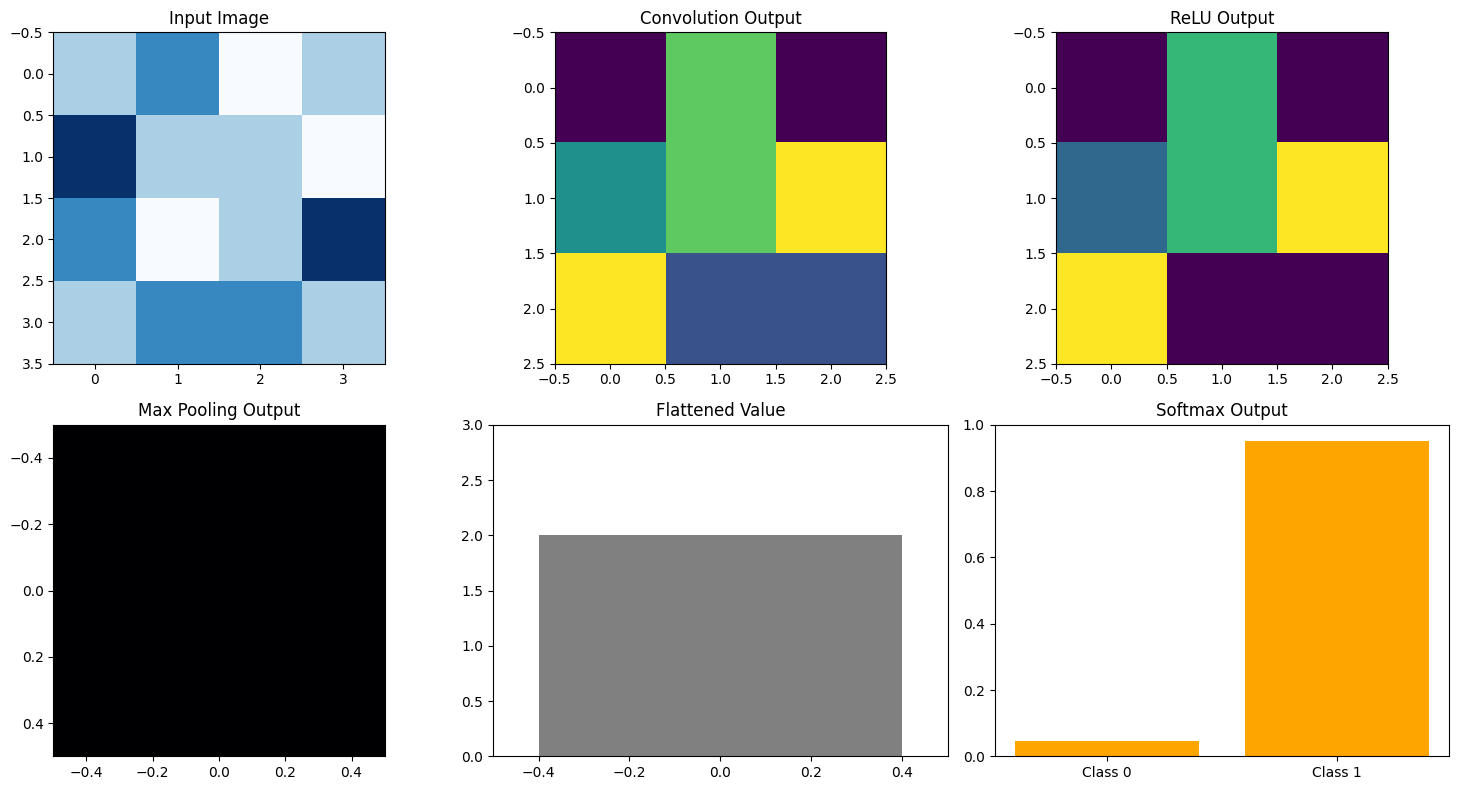

Convolution Output:
 [[-1.  2. -1.]
 [ 1.  2.  3.]
 [ 3.  0.  0.]]
ReLU Output:
 [[0. 2. 0.]
 [1. 2. 3.]
 [3. 0. 0.]]
Pooled Output:
 [[2.]]
Flattened Vector:
 [2.]
Logits (z):
 [2. 5.]
Softmax Output:
 [0.04742587 0.95257413]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input Image (4x4)
X = np.array([
    [1, 2, 0, 1],
    [3, 1, 1, 0],
    [2, 0, 1, 3],
    [1, 2, 2, 1]
])

# Step 2: Convolution Filter (2x2)
F = np.array([
    [1, 0],
    [-1, 1]
])

# Convolution Function
def convolve2d(X, F, stride=1):
    h, w = X.shape
    fh, fw = F.shape
    oh = (h - fh) // stride + 1
    ow = (w - fw) // stride + 1
    out = np.zeros((oh, ow))
    for i in range(oh):
        for j in range(ow):
            region = X[i:i+fh, j:j+fw]
            out[i, j] = np.sum(region * F)
    return out

conv_out = convolve2d(X, F)

# Step 3: ReLU Activation
relu_out = np.maximum(0, conv_out)

# Step 4: Max Pooling (2x2)
def max_pool2x2(X):
    h, w = X.shape
    out = np.zeros((h // 2, w // 2))
    for i in range(h // 2):
        for j in range(w // 2):
            region = X[2*i:2*i+2, 2*j:2*j+2]
            out[i, j] = np.max(region)
    return out

pooled_out = max_pool2x2(relu_out)

# Step 5: Flatten
flat = pooled_out.flatten()

# Step 6: Dense Layer (2 units)
W = np.array([[1],
              [2]])
b = np.array([0, 1])

z = W @ flat.reshape(1, -1) + b.reshape(-1, 1)
z = z.flatten()

# Step 7: Softmax
def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

output = softmax(z)

# === VISUALIZATION ===
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

axes[0].imshow(X, cmap='Blues')
axes[0].set_title("Input Image")

axes[1].imshow(conv_out, cmap='viridis')
axes[1].set_title("Convolution Output")

axes[2].imshow(relu_out, cmap='viridis')
axes[2].set_title("ReLU Output")

axes[3].imshow(pooled_out, cmap='magma')
axes[3].set_title("Max Pooling Output")

axes[4].bar([0], [flat[0]], color='gray')
axes[4].set_title("Flattened Value")
axes[4].set_xlim(-0.5, 0.5)
axes[4].set_ylim(0, np.max(flat) + 1)

axes[5].bar(["Class 0", "Class 1"], output, color='orange')
axes[5].set_title("Softmax Output")

plt.tight_layout()
plt.show()

# === TEXT OUTPUT ===
print("Convolution Output:\n", conv_out)
print("ReLU Output:\n", relu_out)
print("Pooled Output:\n", pooled_out)
print("Flattened Vector:\n", flat)
print("Logits (z):\n", z)
print("Softmax Output:\n", output)
